In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('train.csv', header=0,names=['ID','Title','Desc'])
test_data = pd.read_csv('test.csv', header=0,names=['ID','Title','Desc'])

In [3]:
train_data.head()


,ID,Title,Desc
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [4]:
test_data.head()

,ID,Title,Desc
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [5]:
print(train_data.shape)
print(test_data.shape)


(120000, 3)
(7600, 3)


In [6]:
train_x = train_data.Desc
test_x = test_data.Desc
train_y = train_data.ID
test_y = test_data.ID

In [7]:
print(train_x.dtype)

object


In [8]:
print(train_y.dtype)

int64


In [9]:
print(type(train_x))

<class 'pandas.core.series.Series'>


In [10]:
print(train_x)

0         Reuters - Short-sellers, Wall Street's dwindli...
1         Reuters - Private investment firm Carlyle Grou...
2         Reuters - Soaring crude prices plus worries\ab...
3         Reuters - Authorities have halted oil export\f...
4         AFP - Tearaway world oil prices, toppling reco...
                                ...                        
119995     KARACHI (Reuters) - Pakistani President Perve...
119996    Red Sox general manager Theo Epstein acknowled...
119997    The Miami Dolphins will put their courtship of...
119998    PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...
119999    INDIANAPOLIS -- All-Star Vince Carter was trad...
Name: Desc, Length: 120000, dtype: object


In [12]:
print(train_y)

0         3
1         3
2         3
3         3
4         3
         ..
119995    1
119996    2
119997    2
119998    2
119999    2
Name: ID, Length: 120000, dtype: int64


In [13]:
import re 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
def remove_html_tag(text):
    html = re.compile('<.*?')
    cleaned_text = html.sub('', text)
    return cleaned_text
train_x = train_x.apply(remove_html_tag)
test_x = test_x.apply(remove_html_tag)

In [15]:
def url_remove(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)
train_x = train_x.apply(url_remove)
test_x = test_x.apply(url_remove)

In [16]:
def word_tokenize(text):
    token = re.findall("[\w']+", text)
    return token

train_x = train_x.apply(word_tokenize)
test_x = test_x.apply(word_tokenize)

In [17]:
print(train_x)

0         [Reuters, Short, sellers, Wall, Street's, dwin...
1         [Reuters, Private, investment, firm, Carlyle, ...
2         [Reuters, Soaring, crude, prices, plus, worrie...
3         [Reuters, Authorities, have, halted, oil, expo...
4         [AFP, Tearaway, world, oil, prices, toppling, ...
                                ...                        
119995    [KARACHI, Reuters, Pakistani, President, Perve...
119996    [Red, Sox, general, manager, Theo, Epstein, ac...
119997    [The, Miami, Dolphins, will, put, their, court...
119998    [PITTSBURGH, at, NY, GIANTS, Time, 1, 30, p, m...
119999    [INDIANAPOLIS, All, Star, Vince, Carter, was, ...
Name: Desc, Length: 120000, dtype: object


In [18]:
train_x = train_x.apply(lambda x: [word.lower() for word in x])
test_x = test_x.apply(lambda x: [word.lower() for word in x])

In [19]:
def remove_stopwords(lst):
    stop_words = set(stopwords.words('english'))
    return [word for word in lst if word.lower() not in stop_words]
train_x = train_x.apply(remove_stopwords)
test_x = test_x.apply(remove_stopwords)

In [20]:
import string
def remove_punctuations(lst):
    return [''.join(char for char in word if char not in string.punctuation) for word in lst]
train_x = train_x.apply(remove_punctuations)
test_x = test_x.apply(remove_punctuations)

In [21]:
def remove_number(lst):
    return [''.join(char for char in word if char not in string.digits) for word in lst if word]
train_x = train_x.apply(remove_number)
test_x = test_x.apply(remove_number)

In [22]:
from nltk.stem import PorterStemmer

def stemming(text):
    porter_stemmer = PorterStemmer()
    return [porter_stemmer.stem(word) for word in text]
train_x = train_x.apply(stemming)
test_x = test_x.apply(stemming)

In [23]:
def remove_extra_words(word_list):
    stopwords = ['href', 'lt', 'gt', 'ii', 'iii', 'ie', 'quot', 'com']
    cleaned_list = []
    for word in word_list:
        if word not in stopwords:
            cleaned_list.append(word)
    return cleaned_list
train_x = train_x.apply(remove_extra_words)
test_x = test_x.apply(remove_extra_words)

In [24]:
print(train_x)

0         [reuter, short, seller, wall, street, dwindl, ...
1         [reuter, privat, invest, firm, carlyl, group, ...
2         [reuter, soar, crude, price, plu, worri, econo...
3         [reuter, author, halt, oil, export, flow, main...
4         [afp, tearaway, world, oil, price, toppl, reco...
                                ...                        
119995    [karachi, reuter, pakistani, presid, pervez, m...
119996    [red, sox, gener, manag, theo, epstein, acknow...
119997    [miami, dolphin, put, courtship, lsu, coach, n...
119998    [pittsburgh, ny, giant, time, , , p, line, ste...
119999    [indianapoli, star, vinc, carter, trade, toron...
Name: Desc, Length: 120000, dtype: object


In [25]:
def join_words_with_space(sentence):
    joined_sentence = ' '.join(sentence)
    return joined_sentence

train_x = train_x.apply(join_words_with_space)
test_x = test_x.apply(join_words_with_space)

In [26]:
print(train_x)

0         reuter short seller wall street dwindl band ul...
1         reuter privat invest firm carlyl group reput m...
2         reuter soar crude price plu worri economi outl...
3         reuter author halt oil export flow main pipeli...
4         afp tearaway world oil price toppl record stra...
                                ...                        
119995    karachi reuter pakistani presid pervez musharr...
119996    red sox gener manag theo epstein acknowledg ed...
119997    miami dolphin put courtship lsu coach nick sab...
119998    pittsburgh ny giant time   p line steeler  rec...
119999    indianapoli star vinc carter trade toronto rap...
Name: Desc, Length: 120000, dtype: object


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(min_df=8, ngram_range=(1,4))
train_arr = tfidf.fit_transform(train_x)
test_arr = tfidf.transform(test_x)
print("No. of features extracted:")
print(len(tfidf.vocabulary_))
print("First 100 feature names:")
print(list(tfidf.vocabulary_.keys())[:100])

# train_arr = train_1.toarray()
# test_arr = test_1.toarray()



No. of features extracted:
63630
First 100 feature names:
['reuter', 'short', 'seller', 'wall', 'street', 'dwindl', 'band', 'ultra', 'cynic', 'see', 'green', 'wall street', 'privat', 'invest', 'firm', 'carlyl', 'group', 'reput', 'make', 'well', 'time', 'occasion', 'controversi', 'play', 'defens', 'industri', 'quietli', 'place', 'bet', 'anoth', 'part', 'market', 'reuter privat', 'privat invest', 'invest firm', 'carlyl group', 'play defens', 'soar', 'crude', 'price', 'plu', 'worri', 'economi', 'outlook', 'earn', 'expect', 'hang', 'stock', 'next', 'week', 'depth', 'summer', 'doldrum', 'soar crude', 'crude price', 'worri economi', 'economi outlook', 'earn expect', 'stock market', 'market next', 'next week', 'author', 'halt', 'oil', 'export', 'flow', 'main', 'pipelin', 'southern', 'iraq', 'intellig', 'show', 'rebel', 'militia', 'could', 'strike', 'infrastructur', 'offici', 'said', 'saturday', 'oil export', 'pipelin southern', 'southern iraq', 'rebel militia', 'oil offici', 'offici said', 's

In [28]:
train_arr.shape

(120000, 63630)

In [29]:
print(type(train_arr))

<class 'scipy.sparse._csr.csr_matrix'>


In [30]:
print(train_arr)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3328101 stored elements and shape (120000, 63630)>
  Coords	Values
  (0, 45518)	0.13261356975869135
  (0, 50368)	0.2516974358497483
  (0, 49228)	0.33727291927216135
  (0, 60306)	0.2301548010127238
  (0, 53415)	0.218923822530067
  (0, 14921)	0.3756288942243625
  (0, 4364)	0.3078728660075022
  (0, 58320)	0.3521298085606761
  (0, 12457)	0.40779847927615775
  (0, 49092)	0.23818287207411454
  (0, 21935)	0.2561941286226132
  (0, 60307)	0.23635961089149665
  (1, 45518)	0.08956690017099833
  (1, 42236)	0.16632343954172832
  (1, 25947)	0.16009554619520633
  (1, 18206)	0.1453347567056614
  (1, 7793)	0.2913966944796007
  (1, 22041)	0.11946319479665723
  (1, 45073)	0.21858778850507699
  (1, 31079)	0.12561930313592773
  (1, 61192)	0.155262503716684
  (1, 56361)	0.11327059772230029
  (1, 37066)	0.25797769401636444
  (1, 11114)	0.1766898703638303
  (1, 40631)	0.1354568272424295
  :	:
  (119999, 46831)	0.11679530435873219
  (119999, 27018)	

In [31]:
feature_names = tfidf.get_feature_names_out()
pd.DataFrame.sparse.from_spmatrix(train_arr[:100], columns=feature_names)

,aa,aa billion,aa footbal,aaa,aapl,aapl news,aaron,aaron peirsol,aaron rodger,ab,...,zone,zoo,zook,zook fire,zoom,zurich,zurich challeng,zurich reuter,zurich switzerland,zvonareva
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score

In [33]:

NB_MN=MultinomialNB(alpha=0.40)
NB_MN.fit(train_arr,train_y)
pred=NB_MN.predict(test_arr)

In [34]:
print("first 20 actual labels")
print(test_y.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

first 20 actual labels
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
first 20 predicted labels
[3, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3]


In [35]:
print("F1 score of Naive Bayes:")
f1 = f1_score(test_y, pred, average='micro')
print(f1)
print("Accuracy of Naive Bayes:")
accuracy = accuracy_score(test_y, pred)
print(accuracy)
print("Accuracy of Naive Bayes in percentage:")
accuracy_percentage = round(accuracy * 100, 3)
print(accuracy_percentage, "%")

F1 score of Naive Bayes:
0.8964473684210527
Accuracy of Naive Bayes:
0.8964473684210527
Accuracy of Naive Bayes in percentage:
89.645 %


In [36]:
import seaborn as sns

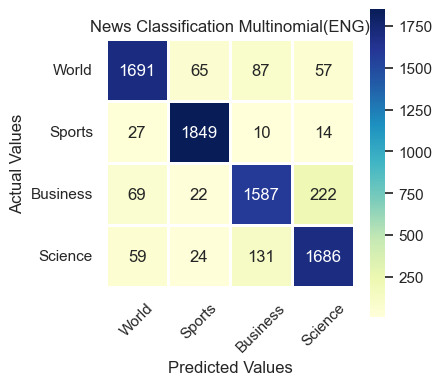

In [37]:
conf_matrix = confusion_matrix(test_y, pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['World', 'Sports', 'Business', 'Science'], columns=['World', 'Sports', 'Business', 'Science'])
sns.set(font_scale=1)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_df, cmap="YlGnBu", linewidths=1, annot=True, square=True, cbar=True, fmt='d')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("News Classification Multinomial(ENG)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:

DT=DecisionTreeClassifier()
DT.fit(train_arr,train_y)
pred=DT.predict(test_arr)

print("first 20 actual labels")
print(test_y.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

In [ ]:
print("F1 score of DTree:")
f1 = f1_score(test_y, pred, average='micro')
print(f1)
print("Accuracy of DTree:")
accuracy = accuracy_score(test_y, pred)
print(accuracy)
print("Accuracy of DTree in percentage:")
accuracy_percentage = round(accuracy * 100, 3)
print(accuracy_percentage, "%")

In [39]:
from sklearn.neighbors import KNeighborsClassifier


In [92]:
Knn = KNeighborsClassifier(n_neighbors = 25, metric = 'minkowski', p = 2)
Knn.fit(train_arr,train_y)

pred=Knn.predict(test_arr)

print("first 20 actual labels")
print(test_y.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

first 20 actual labels
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
first 20 predicted labels
[3, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3]


In [93]:
print("F1 score of Knn:")
f1 = f1_score(test_y, pred, average='micro')
print(f1)
print("Accuracy of Knn:")
accuracy = accuracy_score(test_y, pred)
print(accuracy)
print("Accuracy of Knn in percentage:")
accuracy_percentage = round(accuracy * 100, 3)
print(accuracy_percentage, "%")

F1 score of Knn:
0.8956578947368421
Accuracy of Knn:
0.8956578947368421
Accuracy of Knn in percentage:
89.566 %


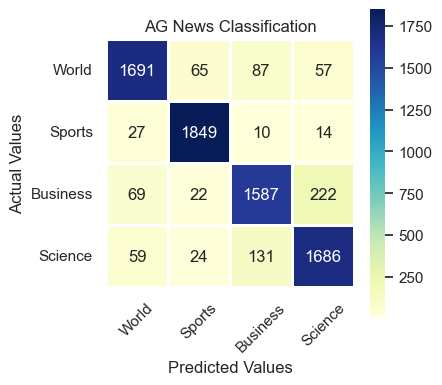

In [155]:
conf_matrix = confusion_matrix(test_y, pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['World', 'Sports', 'Business', 'Science'], columns=['World', 'Sports', 'Business', 'Science'])
sns.set(font_scale=1)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_df, cmap="YlGnBu", linewidths=1, annot=True, square=True, cbar=True, fmt='d')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("News Classification Multinomial(ENG)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [39]:
from sklearn.svm import SVC


In [ ]:
svm = SVC(kernel="linear",random_state=0)
svm.fit(train_arr,train_y)

pred=svm.predict(test_arr)

print("first 20 actual labels")
print(test_y.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

In [ ]:
print("F1 score of svm:")
f1 = f1_score(test_y, pred, average='micro')
print(f1)
print("Accuracy of svm:")
accuracy = accuracy_score(test_y, pred)
print(accuracy)
print("Accuracy of svm in percentage:")
accuracy_percentage = round(accuracy * 100, 3)
print(accuracy_percentage, "%")

In [74]:
from sklearn.svm import SVC

In [ ]:
ksvm = SVC(kernel = 'rbf', random_state = 0)
ksvm.fit(train_arr,train_y)

pred=ksvm.predict(test_arr)

print("first 20 actual labels")
print(test_y.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

In [ ]:
print("F1 score of ksvm:")
f1 = f1_score(test_y, pred, average='micro')
print(f1)
print("Accuracy of ksvm:")
accuracy = accuracy_score(test_y, pred)
print(accuracy)
print("Accuracy of ksvm in percentage:")
accuracy_percentage = round(accuracy * 100, 3)
print(accuracy_percentage, "%")

In [95]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
Rf.fit(train_arr,train_y)

pred=Rf.predict(test_arr)

print("first 20 actual labels")
print(test_y.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

first 20 actual labels
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
first 20 predicted labels
[3, 4, 4, 2, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3]


In [96]:
print("F1 score of Rf:")
f1 = f1_score(test_y, pred, average='micro')
print(f1)
print("Accuracy of Rf:")
accuracy = accuracy_score(test_y, pred)
print(accuracy)
print("Accuracy of Rf in percentage:")
accuracy_percentage = round(accuracy * 100, 3)
print(accuracy_percentage, "%")

F1 score of Rf:
0.8875
Accuracy of Rf:
0.8875
Accuracy of Rf in percentage:
88.75 %


In [1]:
def whichtype(hey):
    cat = {
        1:"World",
        2:"Sports",
        3:"Business",
        4:"Science"
    }
    return cat.get(hey,-1)

In [53]:
Mul = NB_MN.predict(tfidf.transform(["sachine tendulkar century"]))
Kay =Knn.predict(tfidf.transform(["Anant Amabi becomes bankrupt"]))


In [54]:
y =whichtype(Mul[0])
z =whichtype(Kay[0])
print(y)
print(z)
    

Sports


In [154]:
import joblib

joblib.dump(tfidf,'tokenization.joblib')
joblib.dump(NB_MN, 'Multinomial.joblib')
joblib.dump(Rf,"Rf.joblib")
joblib.dump(Knn, "Knn.joblib")




['Knn.joblib']

In [157]:
joblib.dump(tfidf,"tokenization.pkl")
joblib.dump(NB_MN, 'Multinomial.pkl')

['Multinomial.pkl']

In [40]:
# To load the model later
loaded_model = joblib.load('model_filename.joblib')
loaded_tfidf = joblib.load('tokenization.joblib')

In [42]:
loaded_model.predict(loaded_tfidf.transform(["Anant Amabi becomes bankrupt"]))

array([3], dtype=int64)